In [1]:
import numpy as np
from scipy.fftpack import fft
from scipy.fftpack import ifftshift,  fftshift
import matplotlib.pyplot as plt

In [54]:
N=1048
w=5. #sirina otvora u mikronima
lamb  = 0.532 # microns
z = 10000 # microns (= 10 mm)
Fnum=w**2/(z*lamb)
print (Fnum)  #Fresnelov broj
x=np.linspace(-50,50,N)  #granice ravni otvora u mikrometirma 
u=np.zeros(x.size, dtype="complex128") #definisemo kompleksno polje


#u[np.logical_and(x>-w/2, x<= w/2)]=1.+0j #jednostruka pukotina Fraunhofer

u[np.logical_and(x>-3*w,x<=-2*w)]=1.+0j
u[np.logical_and(x>2*w,x<=3*w)]=1.+0j
uf=u*np.exp(1j*np.pi*x**2/(lamb*z))   # Fresnel

0.0046992481203


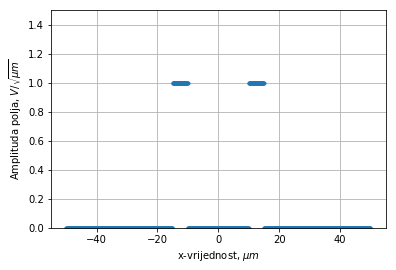

In [55]:
#crtanje otvora
plt.plot(x,np.abs(u),'.')
plt.xlabel(r"x-vrijednost, $\mu m$")
plt.ylabel(r"Amplituda polja, $V/ \sqrt{\mu m}$")
plt.ylim(0,1.5)
plt.grid(True)
plt.show()

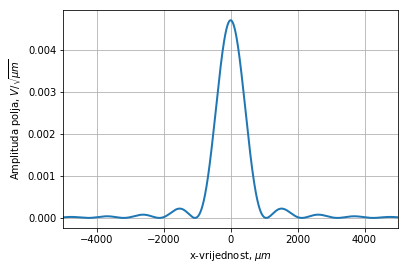

In [56]:
#analiticki rezultat
y = np.arange(-10000, 10000, 1)
F = np.sinc(w * y / (lamb*z))
I = 1. / (lamb * z) * (w * F)**2

plt.plot(y,I,linewidth = 2)
plt.xlim((-5000, 5000))
plt.xlabel(r"x-vrijednost, $\mu m$")
plt.ylabel(r"Amplituda polja, $V/ \sqrt{\mu m}$")

plt.grid(True)
plt.show()


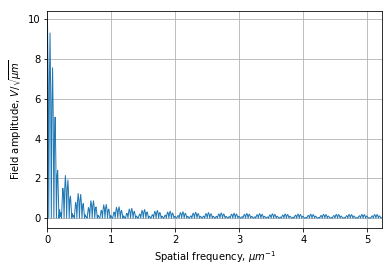

(10.469999999999859, 0.09551098376313405)


In [57]:
# FFT kompjutacija
dx=x[1]-x[0]  #rezolucija
fs=1./dx  #prostorna frekvencija
f=(fs/N)*np.arange(0,N)   #vrijednosti frekvencijaa (trebamo za crtanje)

U=fft(ifftshift(u))*dx  #mnozim sa dx zbog jedinica
Uf=fft(ifftshift(uf))*dx
# Plot the field up to the Nyquist frequency, fS / 2
plt.plot(f, np.abs(U), linewidth = 1)
plt.xlim((0, fs / 2))
plt.xlabel(r'Spatial frequency, $\mu m^{-1}$')
plt.ylabel(r'Field amplitude, $V / \sqrt{\mu m}$')
plt.grid(True)
plt.show()
print(fs,dx)


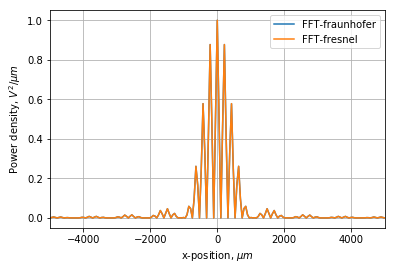

In [58]:
#MALO SREDJIVANJA
xPrime   = np.hstack((f[-(f.size/2):] - fs, f[0:f.size/2])) * lamb * z

UU=fftshift(U*np.conj(U))/(lamb*z)
UU=UU/UU.max() #normiranje na 1
Uf=fftshift(Uf*np.conj(Uf))/(lamb*z)
Uf=Uf/Uf.max()

#plt.plot(xPrime, np.abs(IrradFFT), '.', label = 'FFT')
plt.plot(xPrime, UU, label = 'FFT-fraunhofer')
plt.plot(xPrime, Uf, label = 'FFT-fresnel')
plt.xlim((-5000, 5000))
plt.xlabel(r'x-position, $\mu m$')
plt.ylabel(r'Power density, $V^2 / \mu m$')
plt.grid(True)
plt.legend()
plt.show()

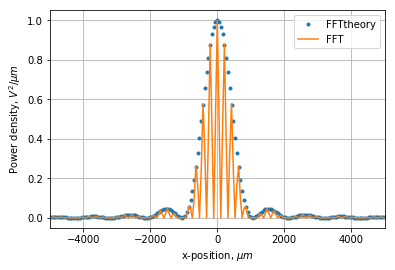

In [59]:
# USPOREDBA SA TEORIJSKOM
UUtheory=1./(lamb*z)*(w*np.sinc(xPrime*w/(lamb*z)))**2
UUtheory=UUtheory/UUtheory.max()  #normiranje na 1

plt.plot(xPrime, np.abs(UUtheory), '.', label = 'FFTtheory')
plt.plot(xPrime, UU, label = 'FFT')
plt.xlim((-5000, 5000))
plt.xlabel(r'x-position, $\mu m$')
plt.ylabel(r'Power density, $V^2 / \mu m$')
plt.grid(True)
plt.legend()
plt.show()

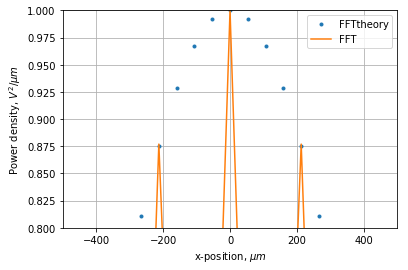

In [60]:
#ODSTUPANJE

plt.plot(xPrime, np.abs(UUtheory), '.', label = 'FFTtheory')
plt.plot(xPrime, UU, label = 'FFT')
plt.xlim((-500, 500))
plt.ylim((0.8,1.0))
plt.xlabel(r'x-position, $\mu m$')
plt.ylabel(r'Power density, $V^2 / \mu m$')
plt.grid(True)
plt.legend()
plt.show()

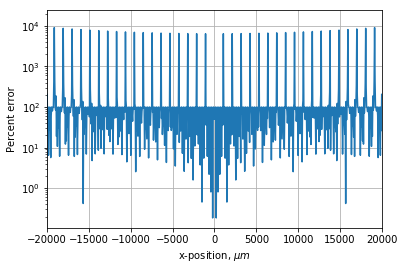

In [61]:
# GRESKE

percentError = np.abs((UUtheory - UU) / UUtheory) * 100

plt.semilogy(xPrime, percentError)
plt.xlabel(r'x-position, $\mu m$')
plt.ylabel('Percent error')
plt.xlim((-20000, 20000))
plt.grid(True)
plt.show()

In [62]:
IU=np.zeros((UU.size/6,UU.size), dtype="complex128")
IU[173]

array([ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j])

In [63]:
for a in range (0,N-1):
    A=UU[a]
    for b in range (0,N/6-1):
        IU[b][a]=A

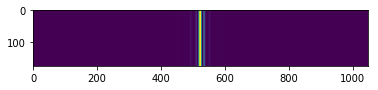

In [64]:
plt.imshow(np.abs(IU))
plt.show()